In [39]:
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [40]:
def evaluate(model, X_test_features, y_test):
    y_pred = model.predict(X_test_features)
    accuracy_test = sklearn.metrics.accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Test Accuracy: {accuracy_test}")
    print(f'Mean Squared Error: {mse:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_pred, y_test)
    class_labels = ['NORMAL', 'PNEUMONIA']
    
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix For SVM - Baseline')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=class_labels)
    print(report)


In [41]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline/y_test.npy"

In [42]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

In [43]:
# Define classifier
svm_model = SVC(kernel='rbf')

### Without Feature Reduction

In [44]:
# Make predictions on the val set
svm_model.fit(X_train_features, y_train)
y_pred_val = svm_model.predict(X_val_features)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.5
Mean Squared Error: 0.50


Test Accuracy: 0.3814102564102564
Mean Squared Error: 0.62


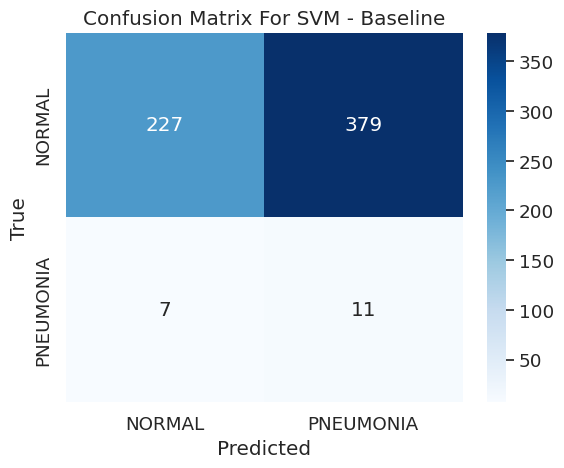

              precision    recall  f1-score   support

      NORMAL       0.37      0.97      0.54       234
   PNEUMONIA       0.61      0.03      0.05       390

    accuracy                           0.38       624
   macro avg       0.49      0.50      0.30       624
weighted avg       0.52      0.38      0.24       624



In [45]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_features, y_test)

### Experimenting on 100 Features

In [46]:
X_train_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_train_features.npy"
X_val_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_val_features.npy"
X_test_features_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/X_test_features.npy"
y_train_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_train.npy"
y_val_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_val.npy"
y_test_dir = "/home/dawlat.akaila/Documents/AI_LABS/PROJECT_FINAL/denoising-pneumonia/Feature_Extraction/baseline_100/y_test.npy"

In [47]:
# load features
X_train_features = np.load(X_train_features_dir)
X_val_features = np.load(X_val_features_dir)
X_test_features = np.load(X_test_features_dir)

y_train = np.load(y_train_dir)
y_val = np.load(y_val_dir)
y_test = np.load(y_test_dir)

In [48]:
# Make predictions on the val set
svm_model.fit(X_train_features, y_train)
y_pred_val = svm_model.predict(X_val_features)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.4375
Mean Squared Error: 0.56


Test Accuracy: 0.38301282051282054
Mean Squared Error: 0.62


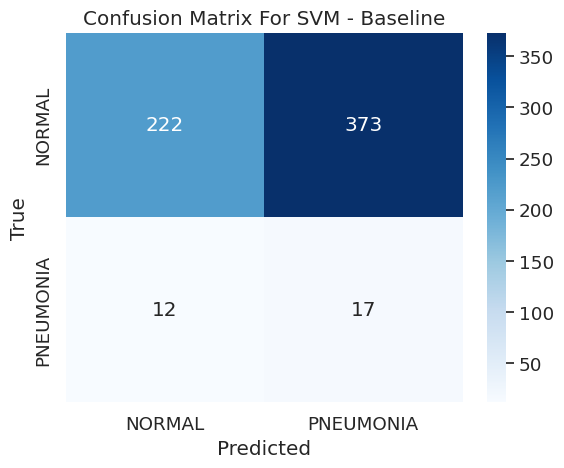

              precision    recall  f1-score   support

      NORMAL       0.37      0.95      0.54       234
   PNEUMONIA       0.59      0.04      0.08       390

    accuracy                           0.38       624
   macro avg       0.48      0.50      0.31       624
weighted avg       0.51      0.38      0.25       624



In [49]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_features, y_test)

### LDA

In [50]:
# Standardize the features (important for LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_features)
X_val_std = scaler.transform(X_val_features)
X_test_std = scaler.transform(X_test_features)

In [51]:
lda = LinearDiscriminantAnalysis(n_components=1)  # Set the desired number of components
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_val_lda = lda.transform(X_val_std)
X_test_lda = lda.transform(X_test_std)

In [52]:
# Make predictions on the val set
svm_model.fit(X_train_lda, y_train)
y_pred_val = svm_model.predict(X_val_lda)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.4375
Mean Squared Error: 0.56


Test Accuracy: 0.3942307692307692
Mean Squared Error: 0.61


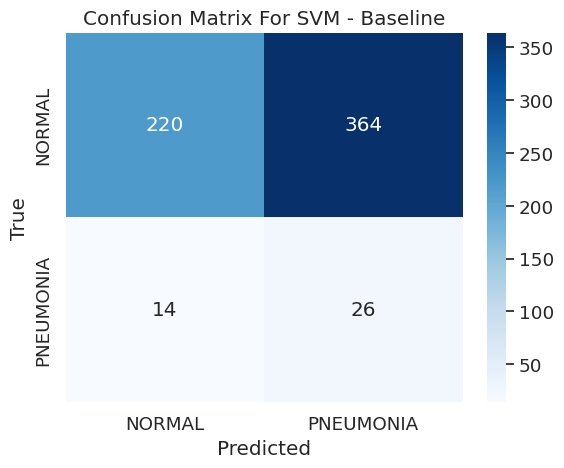

              precision    recall  f1-score   support

      NORMAL       0.38      0.94      0.54       234
   PNEUMONIA       0.65      0.07      0.12       390

    accuracy                           0.39       624
   macro avg       0.51      0.50      0.33       624
weighted avg       0.55      0.39      0.28       624



In [53]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_lda, y_test)

### PCA

In [54]:
scaled_X_train = scaler.fit_transform(X_train_features)

n_components = 16
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(scaled_X_train)

print(X_train_pca.shape)

(5216, 16)


In [55]:
scaled_X_val = scaler.transform(X_val_features)

n_components = 16
pca = PCA(n_components=n_components)
X_val_pca = pca.fit_transform(scaled_X_val)

print(X_val_pca.shape)

(16, 16)


In [56]:
scaled_X_test = scaler.transform(X_test_features)

n_components = 16
pca = PCA(n_components=n_components)
X_test_pca = pca.fit_transform(scaled_X_test)

print(X_test_pca.shape)

(624, 16)


In [57]:
# Make predictions on the val set
svm_model.fit(X_train_pca, y_train)
y_pred_val = svm_model.predict(X_val_pca)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.375
Mean Squared Error: 0.62


Test Accuracy: 0.5448717948717948
Mean Squared Error: 0.46


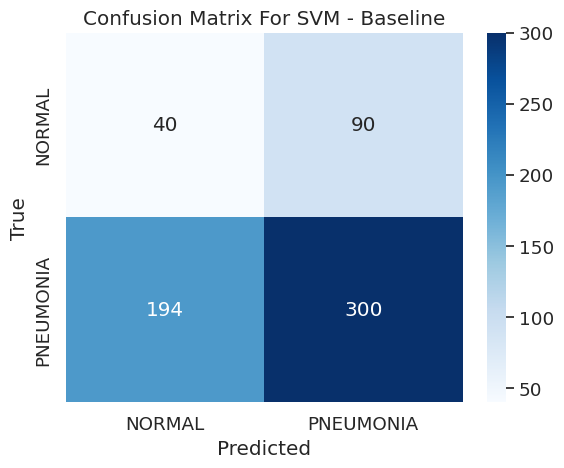

              precision    recall  f1-score   support

      NORMAL       0.31      0.17      0.22       234
   PNEUMONIA       0.61      0.77      0.68       390

    accuracy                           0.54       624
   macro avg       0.46      0.47      0.45       624
weighted avg       0.49      0.54      0.51       624



In [58]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_pca, y_test)

### T-SNE

In [59]:
# Fit the scaler on the training data and transform the training, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train_features)
X_val_scaled = scaler.transform(X_val_features)
X_test_scaled = scaler.transform(X_test_features)

# Apply t-SNE to reduce the dimensionality to 2D for scaled data
tsne = TSNE(n_components=2,perplexity=5)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_val_tsne = tsne.fit_transform(X_val_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [60]:
# Make predictions on the val set
svm_model.fit(X_train_tsne, y_train)
y_pred_val = svm_model.predict(X_val_tsne)

# Evaluate the model on the test set
accuracy_val = sklearn.metrics.accuracy_score(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f'Mean Squared Error: {mse:.2f}')

Validation Accuracy: 0.5
Mean Squared Error: 0.50


Test Accuracy: 0.5657051282051282
Mean Squared Error: 0.43


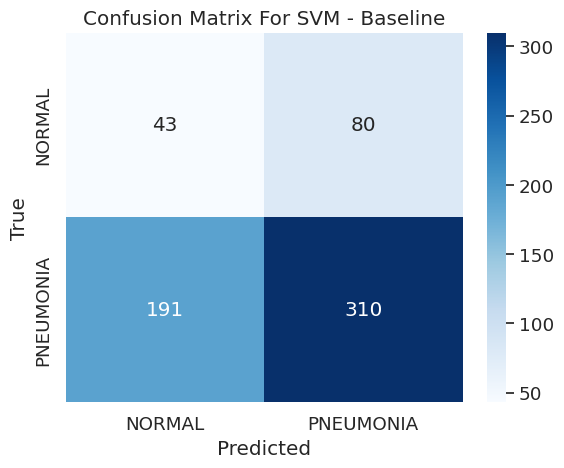

              precision    recall  f1-score   support

      NORMAL       0.35      0.18      0.24       234
   PNEUMONIA       0.62      0.79      0.70       390

    accuracy                           0.57       624
   macro avg       0.48      0.49      0.47       624
weighted avg       0.52      0.57      0.53       624



In [61]:
# Evalutaing the model on the test set
evaluate(svm_model, X_test_tsne, y_test)

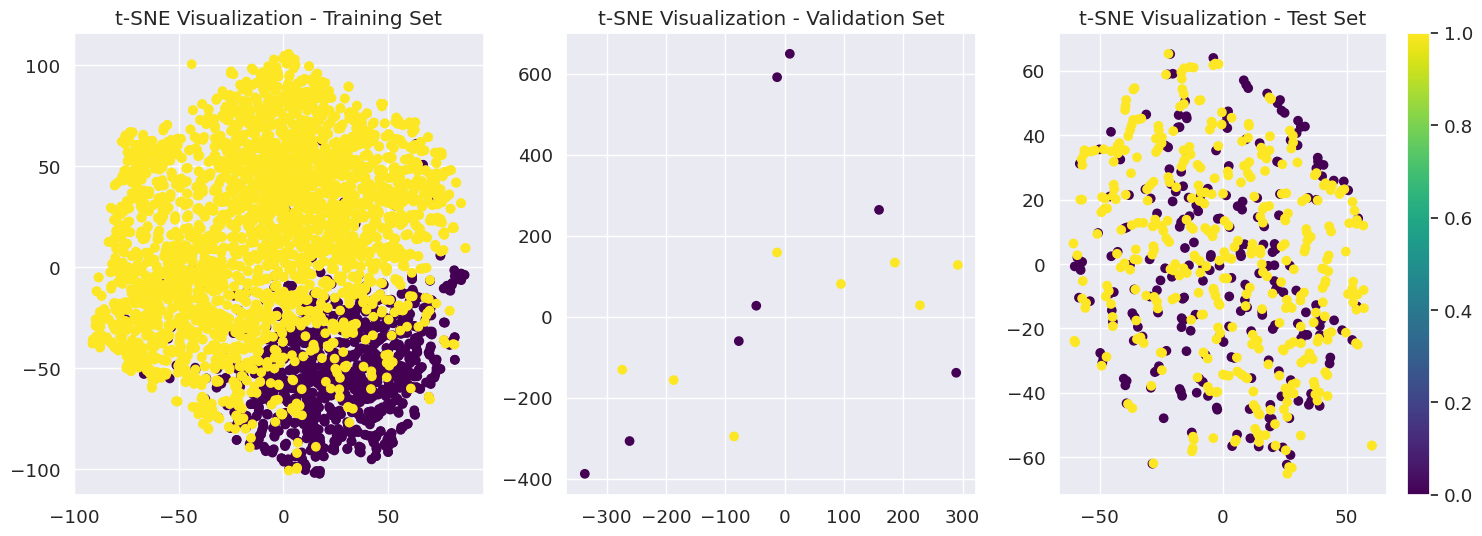

In [62]:
# Create scatter plots for training, validation, and test sets
# (similar to the previous example)
# Create scatter plots for training, validation, and test sets
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization - Training Set')

plt.subplot(1, 3, 2)
plt.scatter(X_val_tsne[:, 0], X_val_tsne[:, 1], c=y_val, cmap='viridis')
plt.title('t-SNE Visualization - Validation Set')

plt.subplot(1, 3, 3)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis')
plt.title('t-SNE Visualization - Test Set')

plt.colorbar()
plt.show()